# <center>Airbnb Listing EDA</center>

### Project Description:
This project focuses on performing an exploratory data analysis (EDA) of Airbnb listings within Albany, New York, United States. The goal is to examine various factors such as price, availability, location, and property type to uncover the underlying trends and patterns that influence the demand for Airbnb listings. Through this analysis, we aim to provide a comprehensive overview of the Airbnb market in Albany city, helping stakeholders to make informed decisions.

### Objectives:
- Analyze key factors that influence the demand for Airbnb listings in the Albany city(Droping any observation except Albany, NY in host_location column.), including but not limited to price, availability, location, and property type.
- Perform thorough data cleaning to prepare the dataset for in-depth analysis, ensuring the removal of outliers and handling of missing values.
- Utilize advanced data visualization techniques to illustrate trends and patterns in the data, making it easier to identify key insights.
- Conduct statistical analysis to substantiate the findings and insights derived from the data.

### Tools:
- Employ Python and Jupyter Notebook as the primary tools for conducting the analysis and visualization, leveraging libraries such as Pandas, NumPy, Matplotlib, and Seaborn.

### Steps:
- Data Cleaning: The data must be efficiently cleaned to remove inaccuracies and prepare it for analysis. This includes handling missing values, removing outliers, and ensuring the data is consistent.
- Data Analysis: should thoroughly examine the impact of various factors like price, availability, location, and property type on the demand for Airbnb listings. 
- Data Visualization giving insights for demand.: should be developed to clearly depict the trends and patterns identified in the analysis. These visualizations should be insightful, making it easy to grasp the dynamics of the Airbnb market in the Albany city.
- Statistical analysis : to validate the trends and patterns observed, providing a solid foundation for the conclusions drawn from the data.
- Findings : to explained a business plan based on the insights gained from the analysis.

### The data was obtained through this link:
https://insideairbnb.com/get-the-data

### Importing the necessary libraries

In [101]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functools
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Print the versions of the libraries
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4


### Load Airbnb Dataset and file for feature describtion.


In [102]:
#v_d = dataframe for feature describtion.
df = pd.read_csv('/Users/drmorsy/Electro_pi/Exploratory Data Analysis/listings.csv')
v_d = pd.read_csv('/Users/drmorsy/Electro_pi/Exploratory Data Analysis/Data_variables_describtion.csv', low_memory=False)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,25549565,https://www.airbnb.com/rooms/25549565,2.024030e+13,11/03/2024,city scrape,Quiet and Pretty in the Heart of Center Square,Private entrance to garden level suite in a hi...,This neighorhood is a village of all kinds of ...,https://a0.muscache.com/pictures/662f1c8d-3841...,9666970,...,4.95,4.92,4.91,NaN,f,1,1,0,0,11.08
1,10768745,https://www.airbnb.com/rooms/10768745,2.024030e+13,11/03/2024,city scrape,Alb hospital area studio bath wifi. (Red),Spacious warm studio in 1840 house close to ho...,NaN,https://a0.muscache.com/pictures/8694ad4b-98f9...,5691268,...,4.87,4.92,4.90,NaN,f,2,2,0,0,6.40
2,28722270,https://www.airbnb.com/rooms/28722270,2.024030e+13,11/03/2024,city scrape,✍Historic Loft Suite @ Downtown Albany,BOOK this attic loft in a renovated historic 2...,+ 92 Walkscore<br />+ 5-minute walk to MVP Are...,https://a0.muscache.com/pictures/798e28e4-70ec...,44434571,...,4.91,4.74,4.82,NaN,f,6,6,0,0,9.56
3,9005989,https://www.airbnb.com/rooms/9005989,2.024030e+13,11/03/2024,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.92,4.87,4.78,NaN,f,1,1,0,0,6.27
4,28868857,https://www.airbnb.com/rooms/28868857,2.024030e+13,11/03/2024,city scrape,⭐Cozy Garden Suite Full Amenities @Downtown Al...,BOOK our affordable basement-level suite in th...,+ 92 Walkscore<br />+ 5-minute walk to MVP Are...,https://a0.muscache.com/pictures/hosting/Hosti...,44434571,...,4.89,4.63,4.69,NaN,f,6,6,0,0,8.48


In [103]:
v_d.drop('Calculated', axis=1, inplace=True)
#f_d = feature description 
def f_d(feature, data=v_d, column='Field'):
    '''
    This function give us some insight about certain feature.
    feature: What I would like to gain insights into.
    Data: The file contains information about each feature, the default is v_d.
    column: The column contains the feature names, and the default column is Field.
    '''
    return data[data[column]==feature]

In [104]:
f_d('accommodates')

,Field,Type,Description,Reference,Unnamed: 5
34,accommodates,integer,The maximum capacity of the listing,NaN,NaN


# About the Dataset
Airbnb is:an online marketplace that connects people who want to rent out their homes with people looking  for accommodations in specific locales. The idea behind Airbnb is simple: matching local people with a spare room or entire home to rent to others who are visiting the area.
1. This Airbnb dataset contains 404 observations from Albany, New York city with 75 columns of data.
2. The data includes both categorical and numerical values, providing a diverse range information about the listings.
3. This data may be useful for analysing trends and patterns the Airbnb market in Albany, New York, United States and also gain insights into the preferences and behavior of Airbnb users in the area.
4. This data has been updated until March 10, 2024.
5. If you want to know the purpose of the feature, just run this function; f_d(data, column, feature).


In [105]:
df.shape

(404, 75)

In [106]:
df.dtypes.value_counts()

object     34
int64      22
float64    19
Name: count, dtype: int64

In [107]:
f_d('price')

,Field,Type,Description,Reference,Unnamed: 5
40,price,currency,daily price in local currency,NaN,NaN


### Data Exploration and Data Cleaning


In [108]:
#basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            404 non-null    int64  
 1   listing_url                                   404 non-null    object 
 2   scrape_id                                     404 non-null    float64
 3   last_scraped                                  404 non-null    object 
 4   source                                        404 non-null    object 
 5   name                                          404 non-null    object 
 6   description                                   392 non-null    object 
 7   neighborhood_overview                         245 non-null    object 
 8   picture_url                                   404 non-null    object 
 9   host_id                                       404 non-null    int

In [109]:
df.head(5).T[:25]

,0,1,2,3,4
id,25549565,10768745,28722270,9005989,28868857
listing_url,https://www.airbnb.com/rooms/25549565,https://www.airbnb.com/rooms/10768745,https://www.airbnb.com/rooms/28722270,https://www.airbnb.com/rooms/9005989,https://www.airbnb.com/rooms/28868857
scrape_id,20240300000000.0,20240300000000.0,20240300000000.0,20240300000000.0,20240300000000.0
last_scraped,11/03/2024,11/03/2024,11/03/2024,11/03/2024,11/03/2024
source,city scrape,city scrape,city scrape,city scrape,city scrape
name,Quiet and Pretty in the Heart of Center Square,Alb hospital area studio bath wifi. (Red),✍Historic Loft Suite @ Downtown Albany,"Studio in The heart of Center SQ, in Albany NY",⭐Cozy Garden Suite Full Amenities @Downtown Al...
description,Private entrance to garden level suite in a hi...,Spacious warm studio in 1840 house close to ho...,BOOK this attic loft in a renovated historic 2...,(21 years of age or older ONLY) NON- SMOKING.....,BOOK our affordable basement-level suite in th...
neighborhood_overview,This neighorhood is a village of all kinds of ...,NaN,+ 92 Walkscore<br />+ 5-minute walk to MVP Are...,"There are many shops, restaurants, bars, museu...",+ 92 Walkscore<br />+ 5-minute walk to MVP Are...
picture_url,https://a0.muscache.com/pictures/662f1c8d-3841...,https://a0.muscache.com/pictures/8694ad4b-98f9...,https://a0.muscache.com/pictures/798e28e4-70ec...,https://a0.muscache.com/pictures/d242a77e-437c...,https://a0.muscache.com/pictures/hosting/Hosti...
host_id,9666970,5691268,44434571,17766924,44434571


In [110]:
df.head(5).T[25:]

,0,1,2,3,4
host_has_profile_pic,t,t,t,t,t
host_identity_verified,t,t,t,t,t
neighbourhood,"Albany, New York, United States",NaN,"Albany, New York, United States","Albany, New York, United States","Albany, New York, United States"
neighbourhood_cleansed,SIXTH WARD,FOURTEENTH WARD,SECOND WARD,SIXTH WARD,SECOND WARD
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN
latitude,42.65345,42.66078,42.64535,42.65559,42.64535
longitude,-73.7645,-73.80553,-73.75365,-73.76506,-73.75365
property_type,Entire guest suite,Entire home,Entire loft,Entire rental unit,Entire guest suite
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
accommodates,2,1,5,4,3


In [111]:
df.count().sum()

27729

In [112]:
# check duplicate rows in dataset
df = df.drop_duplicates()
df.count().sum()

27729

In [113]:
df.isnull().sum().sum()

2571

In [114]:
df['id'].nunique()

404

In [115]:
df['host_id'].nunique()

192

##### From the exploration above we discover some facts about this Airbnb Dataset.
1. The Data includes both categorical and numeric values.
2. There is no any duplicate rows in Dataset.
3. There are some columns are not required for our analysis.
4. Dataset contains 2571 null values.
5. All listings are unique but some of them common between the same host.
##### Some actions for make dataset more clear
1. Drop unuseful features and observations.
2. Feature formate conversion.
3. Handeling missing values.
4. Handeling outliers.

#### 1. Drop unuseful features and observations.
- By making some investigation to dataset features, we will find some features have no output on our analysis, for this we are going to drop them.
- Droping any observation rather except Albany, NY in host_location column.

In [116]:
df.describe(include=['bool', 'object']).iloc[:,:20]

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications
count,404,404,404,404,392,245,404,404,404,404,313,214,375,375,389,403,404,404,321,404
unique,404,2,2,403,357,200,400,192,175,189,21,96,4,14,38,2,185,185,31,4
top,https://www.airbnb.com/rooms/25549565,11/03/2024,city scrape,Lovely private room in Albany,Charming 5 room bed and breakfast located acro...,The Argus Hotel is located directly on Washing...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/232967878,Diana,28/12/2018,"Albany, NY",I have the great honor of being able to invite...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Pine Hills,"['email', 'phone']"
freq,1,380,350,2,5,11,3,22,25,22,232,10,318,314,91,210,22,22,65,328


In [117]:
df.describe(include=['bool', 'object']).iloc[:,20:]

,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,404,404,245,404,404,404,404,404,350,399,404,362,362,404
unique,2,2,1,15,20,3,17,399,121,1,2,305,159,2
top,t,t,"Albany, New York, United States",SIXTH WARD,Entire rental unit,Entire home/apt,1 bath,"[""Microwave"", ""Iron"", ""Smoke alarm"", ""Shower g...",$100.00,t,11/03/2024,01/01/2023,25/02/2024,f
freq,396,360,245,88,198,287,247,2,16,399,380,4,20,310


In [118]:
df.describe().iloc[:,:20]

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
count,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,404.000000,0.0,404.000000,404.000000,404.000000,350.000000,400.000000,350.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000
mean,5.075502e+17,2.024030e+13,2.215851e+08,22.613861,38.175743,NaN,42.657382,-73.776875,3.522277,1.211429,1.620000,1.748571,5.222772,538.388614,5.086634,5.60396,762.363861,785.210396,5.266337,780.669059
std,4.254315e+17,0.000000e+00,1.796507e+08,137.436182,243.984768,NaN,0.009623,0.019607,2.493067,0.618146,1.035994,1.208701,21.515183,439.154189,21.486216,21.64183,447.466853,438.579291,21.480950,436.704312
min,1.489424e+06,2.024030e+13,6.490680e+05,1.000000,1.000000,NaN,42.630660,-73.876489,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,4.662195e+07,2.024030e+13,4.762598e+07,2.000000,2.000000,NaN,42.651845,-73.790344,2.000000,1.000000,1.000000,1.000000,1.000000,126.250000,1.000000,1.00000,365.000000,365.000000,1.000000,365.000000
50%,6.686083e+17,2.024030e+13,1.870609e+08,4.000000,5.000000,NaN,42.657168,-73.773448,3.000000,1.000000,1.000000,1.000000,2.000000,365.000000,2.000000,2.00000,1125.000000,1125.000000,2.000000,1125.000000
75%,9.022064e+17,2.024030e+13,3.872668e+08,8.000000,13.000000,NaN,42.662161,-73.761915,4.000000,1.000000,2.000000,2.000000,3.000000,1125.000000,3.000000,3.00000,1125.000000,1125.000000,3.000000,1125.000000
max,1.104977e+18,2.024030e+13,5.531120e+08,1177.000000,2118.000000,NaN,42.714896,-73.738103,16.000000,7.000000,7.000000,8.000000,365.000000,1125.000000,365.000000,365.00000,1125.000000,1125.000000,365.000000,1125.000000


In [119]:
df.describe().iloc[:,20:]

,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,0.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,362.000000,362.000000,...,362.000000,362.000000,362.000000,362.000000,0.0,404.000000,404.000000,404.000000,404.000000,362.000000
mean,NaN,14.324257,32.564356,51.866337,202.027228,54.732673,16.022277,1.205446,4.793729,4.828978,...,4.871298,4.875856,4.710166,4.751243,NaN,5.133663,3.769802,1.358911,0.004950,1.992403
std,NaN,11.817315,23.493589,34.432470,131.345837,98.541437,21.572016,1.835646,0.283063,0.273238,...,0.220687,0.250180,0.328145,0.297942,NaN,5.436021,5.534819,2.623126,0.070272,1.957821
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,...,3.000000,2.670000,3.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.050000
25%,NaN,0.000000,1.000000,12.000000,79.000000,4.000000,1.000000,0.000000,4.720000,4.800000,...,4.830000,4.852500,4.582500,4.670000,NaN,1.000000,1.000000,0.000000,0.000000,0.510000
50%,NaN,15.000000,39.000000,64.000000,244.000000,16.000000,7.000000,0.000000,4.880000,4.910000,...,4.950000,4.960000,4.820000,4.820000,NaN,3.000000,1.000000,0.000000,0.000000,1.370000
75%,NaN,26.000000,54.000000,83.000000,327.250000,61.000000,22.000000,2.000000,4.990000,5.000000,...,5.000000,5.000000,4.950000,4.940000,NaN,6.500000,4.000000,1.250000,0.000000,2.760000
max,NaN,30.000000,60.000000,90.000000,365.000000,777.000000,131.000000,8.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,22.000000,22.000000,11.000000,1.000000,11.080000


In [120]:
list_of_droped_features = ['host_response_rate', 'bathrooms_text', 'bathrooms','host_acceptance_rate','number_of_reviews_ltm', 'number_of_reviews_l30d',
            'first_review', 'last_review','calculated_host_listings_count_entire_homes','neighbourhood_cleansed'
             , 'calculated_host_listings_count_private_rooms', 'host_response_time','neighbourhood','license'
            ,'calculated_host_listings_count_shared_rooms','host_since', 'minimum_minimum_nights', 'maximum_minimum_nights', 
            'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
            'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified','amenities',
            'instant_bookable','host_total_listings_count','has_availability', 'listing_url', 'scrape_id','last_scraped',
            'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
            'host_picture_url',	'host_neighbourhood', 'host_listings_count','host_about','host_thumbnail_url',
            'neighbourhood_group_cleansed', 'latitude', 'longitude', 'calendar_updated', 'calendar_last_scraped']

In [121]:
df.drop(list_of_droped_features, axis=1, inplace=True)


In [122]:
# Our dataset contains 42 listings that have never been reviewed, we will drop them because we need the reviewd listings in our analysis.
print(df['number_of_reviews'].value_counts(ascending=False).head(1))

number_of_reviews
0    42
Name: count, dtype: int64


In [123]:
df=df.sort_values(by='number_of_reviews')
df.drop(df.index[:42], inplace=True)

In [124]:
# We can custimize related features in one feature, by taking the average of all reviews.
new_features = df[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication','review_scores_location','review_scores_value']]
df['avg_review_scores'] = new_features.sum(axis=1)/len(new_features.columns)
df.drop(new_features, axis=1, inplace=True)
df['avg_review_scores'].sample(3)

184    4.937143
230    4.440000
282    4.928571
Name: avg_review_scores, dtype: float64

#### 2. Feature formate conversion.


In [125]:
df['price']=df['price'].replace('[/$,]', '',regex=True).astype('float')

#### 3. Handeling missing values.

In [126]:
#from previous investigation we see that the most frequent value is 'Albany, NY' by about 75% out of all values.
#for this, I will handel all missing values in this feature by this value.
df.fillna({'host_location':df['host_location'].mode()[0]}, inplace=True)


host_location
Albany, NY                 0.792818
New York, NY               0.074586
Latham, NY                 0.019337
Stamford, NY               0.016575
Voorheesville, NY          0.016575
Saratoga Springs, NY       0.013812
Esperance, NY              0.011050
United States              0.011050
Gloversville, NY           0.008287
New York, United States    0.005525
Providence, RI             0.005525
Schenectady, NY            0.002762
Washington, DC             0.002762
Northampton, PA            0.002762
Glenville, NY              0.002762
Roselle, NJ                0.002762
Colonie, NY                0.002762
Rensselaer, NY             0.002762
Valley Stream, NY          0.002762
Delmar, NY                 0.002762
Name: proportion, dtype: float64

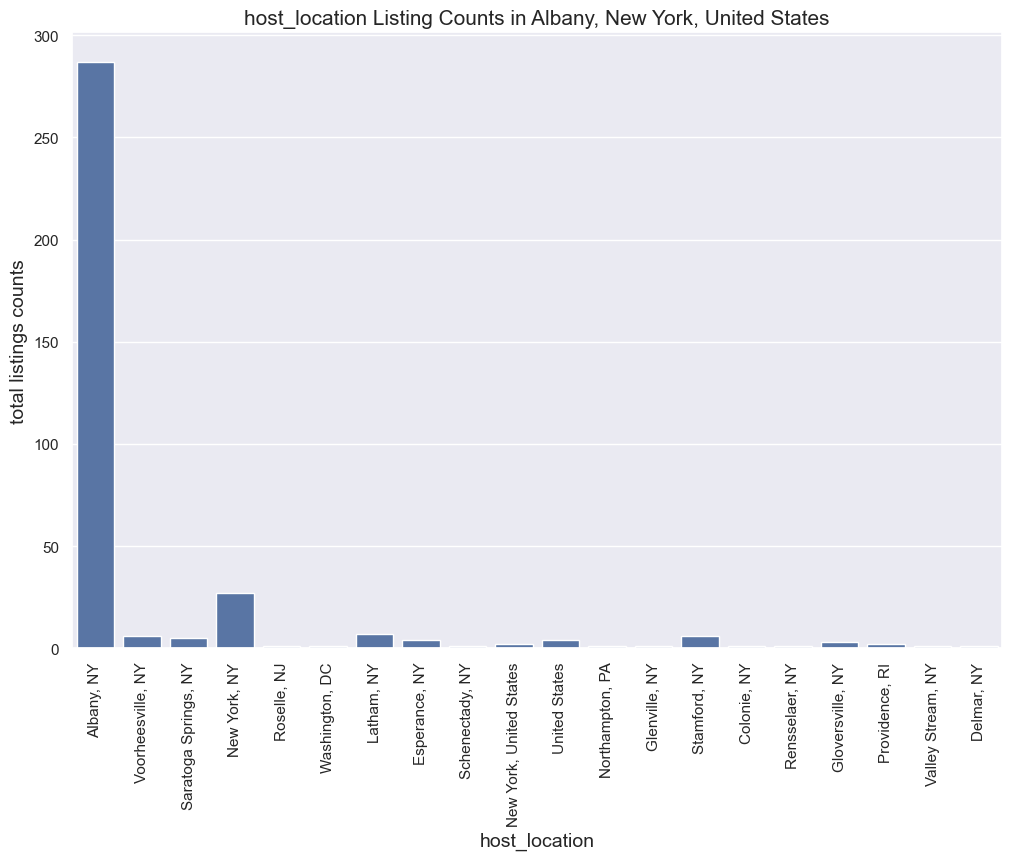

In [127]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot of the room_type data
my_plot = sns.countplot(x="host_location", data=df)
# Set the title of the plot
plt.title('host_location Listing Counts in Albany, New York, United States', fontsize=15)

# Set the x-axis label
plt.xlabel('host_location', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
df['host_location'].value_counts(normalize=True)

### About 80% of all listing demand are in Albany, NY, for our analysis we will exclude all except it.

In [128]:
list_1 = list(df[df.host_location != 'Albany, NY'].index)
df = df.drop(list_1)

In [129]:
df.drop('host_location', axis=1, inplace=True)


There missing values in the following features('bedrooms','beds','price'), we are going to do some analysis to fill these missing values.

In [130]:
def group_by_dict(data,col_1, col_2):
    '''this fuanction takes three arguments, datafram and two columns 
    returning dictionary(keys = unique values of col_1, values = median of col_2 grouped by unique values of col_1)'''
    return dict(data.groupby(col_1)[col_2].median())

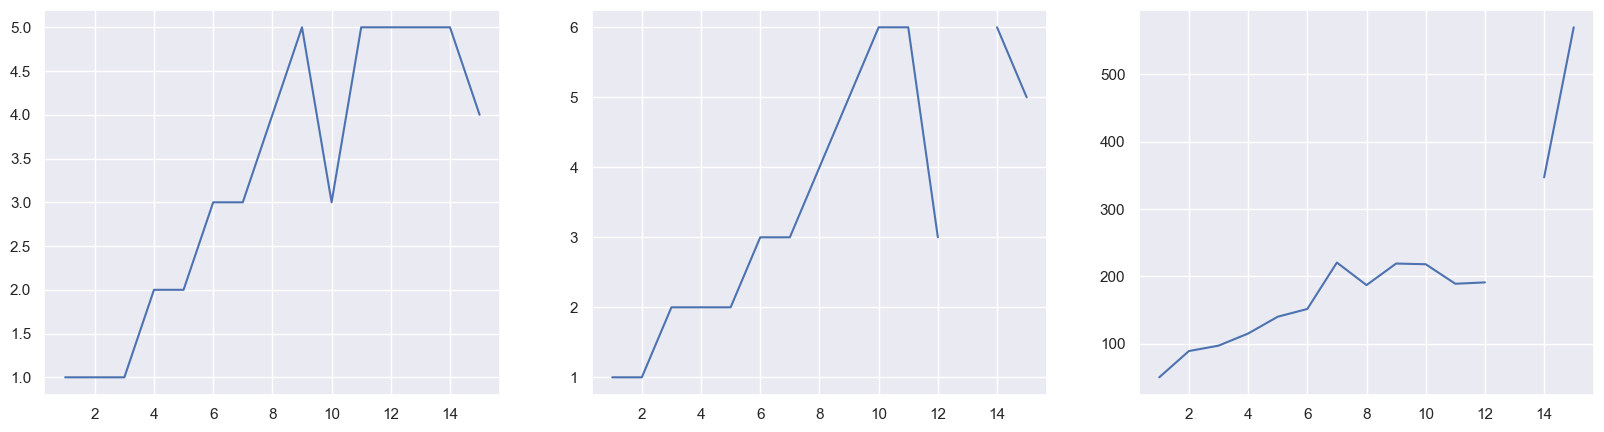

In [131]:
acc_room = group_by_dict(df,'accommodates', 'bedrooms')
acc_bed = group_by_dict(df,'accommodates', 'beds')
acc_price = group_by_dict(df,'accommodates', 'price')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.plot(acc_room.keys(), acc_room.values())
ax2.plot(acc_bed.keys(), acc_bed.values())
ax3.plot(acc_price.keys(), acc_price.values())
# From this analysis, we found taht all three features(accommodates,beds,price)  related to bedrooms with some exceptions but 
# we can find some pattern to fillna in all three features by using this analysis.
# First: start with filling NaN of returned dictionary from group_by_dict() function.
# second : filling NaN of these datafram's features.

Because we have just one NaN in each acc_bed and acc_price dicts, we will handel it by simple function, this function fillna by taking the average (2 higher values ​​+ 2 lower values).


In [132]:
def fill_dict_na(dict_):
    def fill_accommodates_nan(row):
        k, v = row
        if np.isnan(v):
            a = [dict_.get(k-1) , dict_.get(k-2) , dict_.get(k+1) , dict_.get(k+2)]
            a_1 = sum(a)/len(a)
            if a_1%1 < 0.5/2:
                a_1 = float(int(a_1))
            elif a_1%1 <= 0.5:
                a_1 = int(a_1)+0.5
            elif a_1%1 < (0.5+0.5/2):
                a_1 = int(a_1)+.5  
            else:
                a_1 = round(a_1)
            row = k, a_1
        return row
    return dict(map(fill_accommodates_nan, dict_.items()))

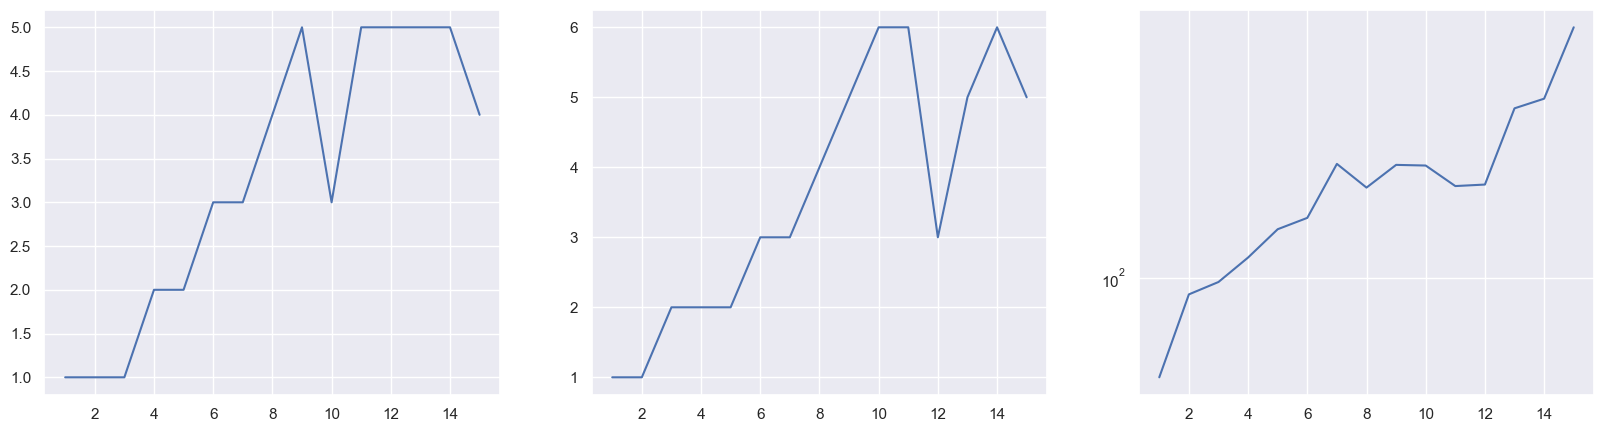

In [133]:
acc_bed = fill_dict_na(acc_bed)
acc_price = fill_dict_na(acc_price)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.plot(acc_room.keys(), acc_room.values())
ax2.plot(acc_bed.keys(), acc_bed.values())
ax3.plot(acc_price.keys(), acc_price.values())
plt.yscale("log")

In [134]:
def replace_price_nan_value(row, col_n, dict_):
    if np.isnan(row[col_n]):
        row[col_n] = dict_[row["accommodates"]]
    # print("Done!")
    return row

In [135]:
df = df.apply(functools.partial(replace_price_nan_value, col_n = 'bedrooms', dict_=acc_room), axis = 1)
df = df.apply(functools.partial(replace_price_nan_value, col_n = 'beds', dict_=acc_bed), axis = 1)
df = df.apply(functools.partial(replace_price_nan_value, col_n = 'price', dict_=acc_price), axis = 1)

#### Now, The data is cleared with no missing values, ready for analysis.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 351 to 0
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              287 non-null    int64  
 1   host_id                         287 non-null    int64  
 2   property_type                   287 non-null    object 
 3   room_type                       287 non-null    object 
 4   accommodates                    287 non-null    int64  
 5   bedrooms                        287 non-null    float64
 6   beds                            287 non-null    float64
 7   price                           287 non-null    float64
 8   minimum_nights                  287 non-null    int64  
 9   maximum_nights                  287 non-null    int64  
 10  availability_30                 287 non-null    int64  
 11  availability_60                 287 non-null    int64  
 12  availability_90                 287 non-n

4. Handeling outliers.

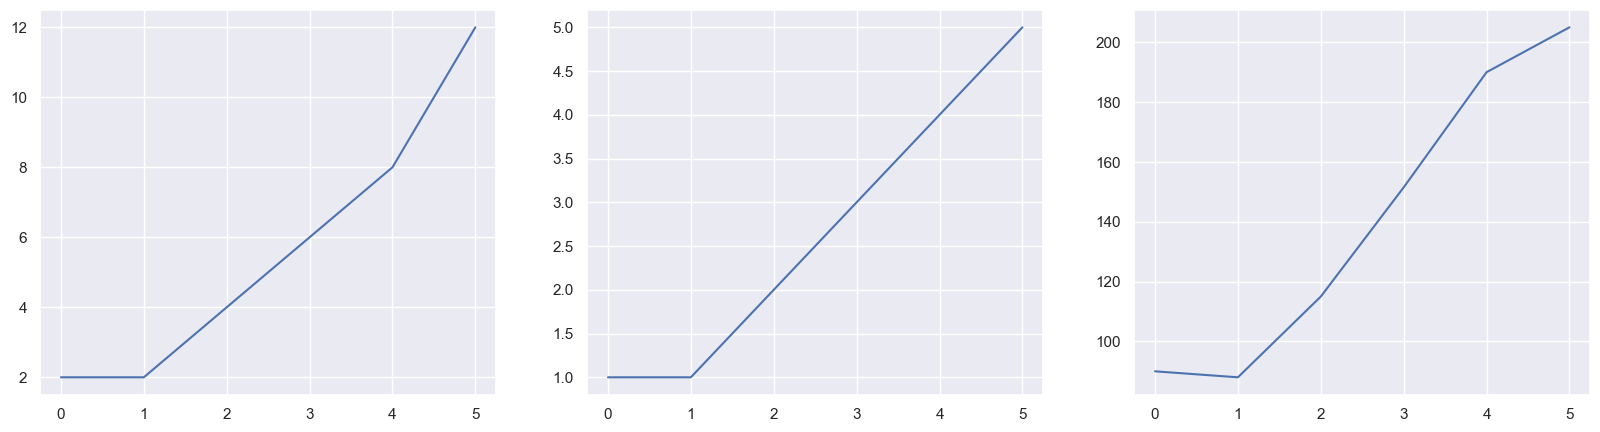

In [137]:
room_acc = group_by_dict(df,'bedrooms', 'accommodates')
room_bed = group_by_dict(df,'bedrooms', 'beds')
room_price = group_by_dict(df,'bedrooms', 'price')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.plot(room_acc.keys(), room_acc.values())
ax2.plot(room_bed.keys(), room_bed.values())
ax3.plot(room_price.keys(), room_price.values())


There are no outliers that could be influence our analysis, and the large and small values match the same in the correspond influenced feature.

# Data Visualization giving insights for demand.

1. Distribution Of Airbnb Bookings Price Range Using Histogram

count    287.000000
mean     114.386760
std       62.066921
min       26.000000
25%       78.000000
50%      101.000000
75%      129.500000
max      570.000000
Name: price, dtype: float64

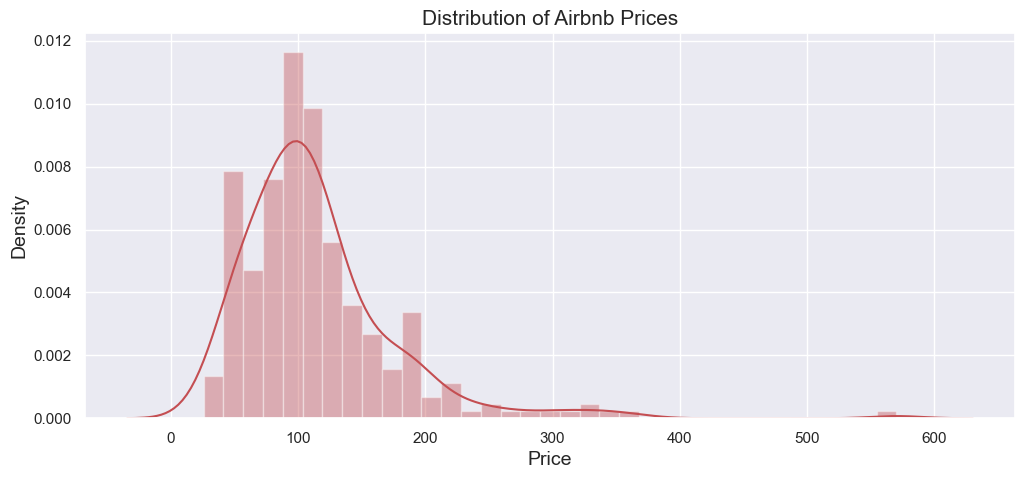

In [138]:
# Declare c_l variable.
c_l = df.columns
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(df['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)
df['price'].describe()

observations -->

The range of prices being charged on Airbnb appears to be from 26 to 628 dollars , with the majority of listings falling in the price range of 50 to 150 dollars(high demand).

The distribution of prices appears to have a peak in the 50 to 150 dollars range, with a relatively lower density of listings in higher and lower price ranges.

There may be fewer listings available at prices above 250 dollars(low demand), as the density of listings drops significantly in this range.



2. Total Listing/Property count in Each property_type and room_type using Count plot.

property_type
Entire rental unit             0.512195
Private room in home           0.174216
Entire home                    0.156794
Private room in rental unit    0.038328
Entire townhouse               0.020906
Room in hotel                  0.017422
Private room in townhouse      0.013937
Entire guest suite             0.013937
Entire vacation home           0.010453
Entire serviced apartment      0.006969
Entire condo                   0.006969
Entire loft                    0.006969
Private room in guest suite    0.006969
Entire place                   0.003484
Entire cottage                 0.003484
Entire guesthouse              0.003484
Room in aparthotel             0.003484
Name: proportion, dtype: float64

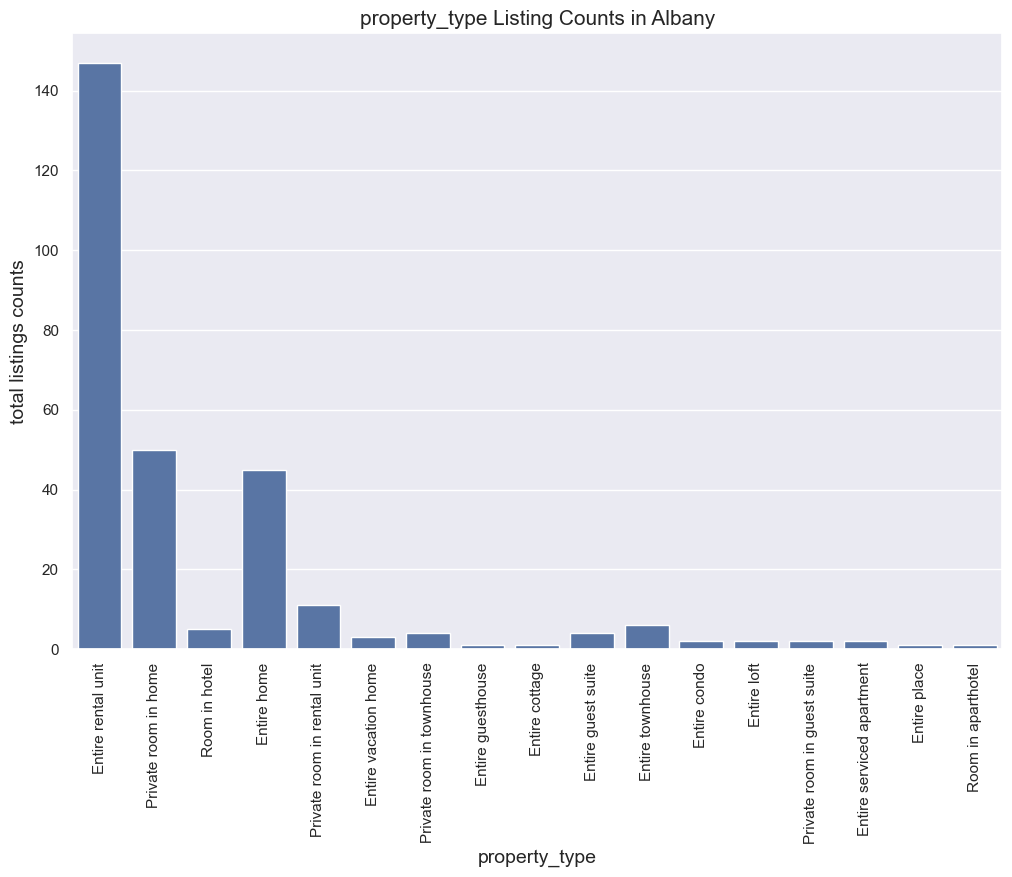

In [139]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot of the property_type data
my_plot = sns.countplot(x="property_type", data=df)
# Set the title of the plot
plt.title('property_type Listing Counts in Albany', fontsize=15)

# Set the x-axis label
plt.xlabel('property_type', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
df['property_type'].value_counts(normalize=True)

room_type,Entire home/apt,Private room
property_type,,
Entire condo,0.006969,0.000000
Entire cottage,0.003484,0.000000
Entire guest suite,0.013937,0.000000
Entire guesthouse,0.003484,0.000000
Entire home,0.156794,0.000000
Entire loft,0.006969,0.000000
Entire place,0.003484,0.000000
Entire rental unit,0.512195,0.000000
Entire serviced apartment,0.006969,0.000000


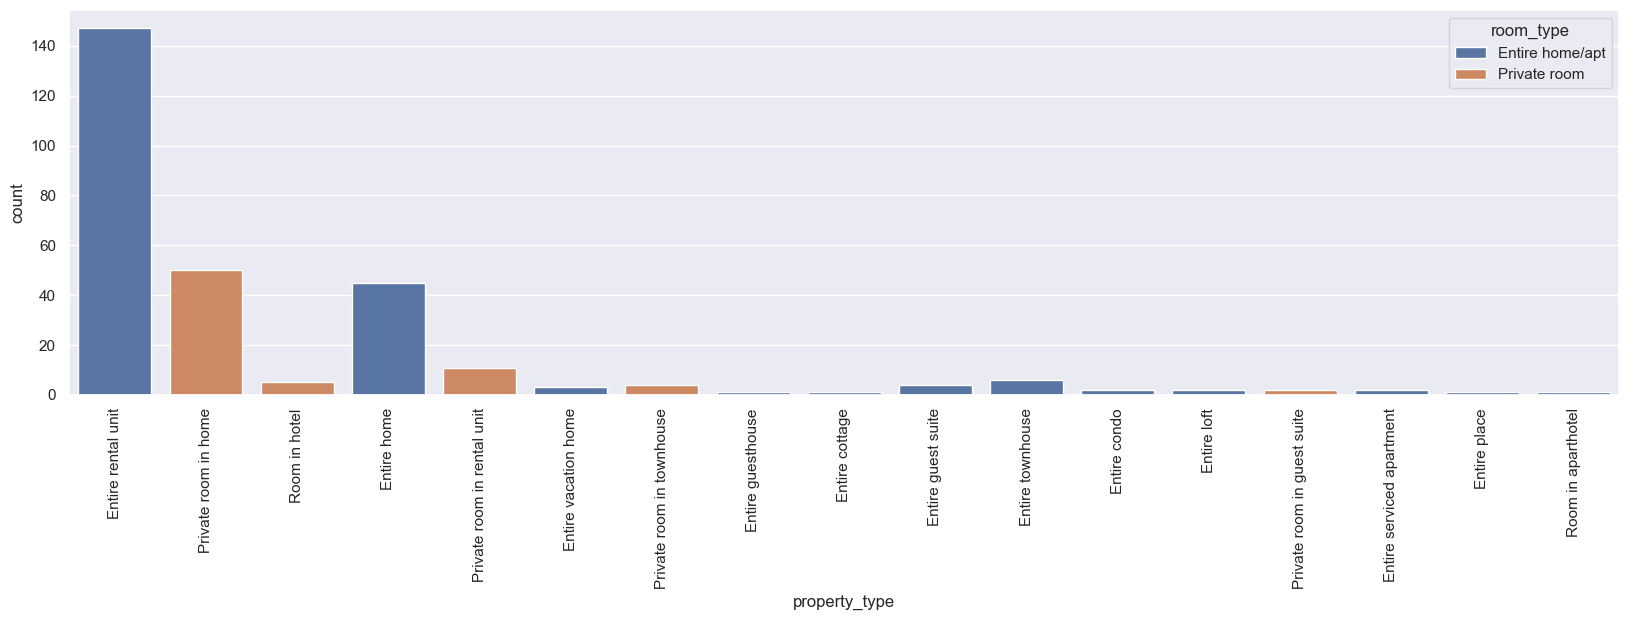

In [140]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
my_plot=sns.countplot(x=df['property_type'], hue=df['room_type'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

pd.crosstab(df['property_type'],df['room_type'], normalize=True)


room_type
Entire home/apt    0.749129
Private room       0.250871
Name: proportion, dtype: float64

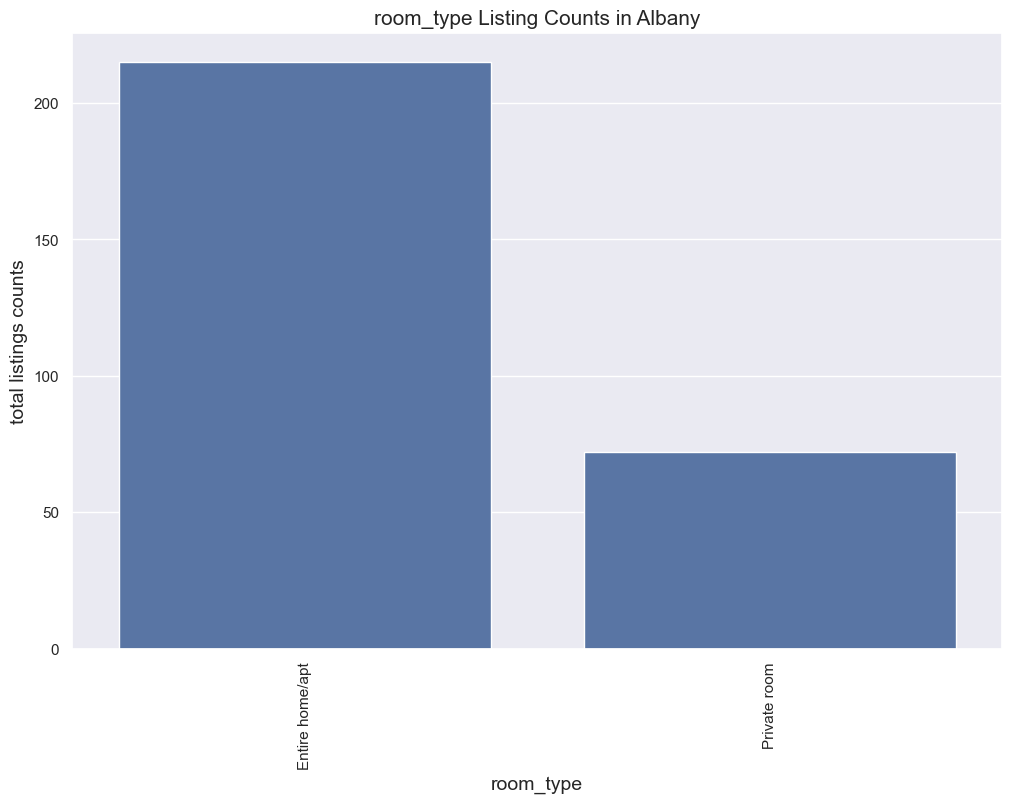

In [141]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot of the room_type data
my_plot = sns.countplot(x="room_type", data=df)
# Set the title of the plot
plt.title('room_type Listing Counts in Albany', fontsize=15)

# Set the x-axis label
plt.xlabel('room_type', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
df['room_type'].value_counts(normalize=True)

Observations -->

- First: the highest property_type in demand are Entire rental unit, Private room in home and Entire home with these presentages 51%, 17.5%, 15.5% respectively.
- Second: The room type demand at Albany city are for Entire home/apt and Private room with these precentages 75%, 25% respectively.

3. Average Price Of Each unique value of accommodates using Point Plot.

Text(0.5, 1.0, 'Average Price by no of accommodates')

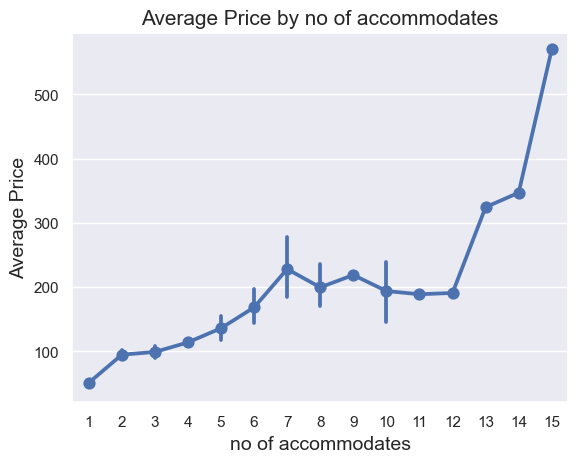

In [142]:
#import mean function from the statistics module 
from statistics import mean

# Create the point plot
sns.pointplot(x = 'accommodates', y='price', data=df, estimator = np.mean)

# Add axis labels and a title
plt.xlabel('no of accommodates',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by no of accommodates',fontsize=15)

Observations --> price increases as no of accommodates increases.

4. Price Distribution Of Each on of bedrooms using Violin Plot.

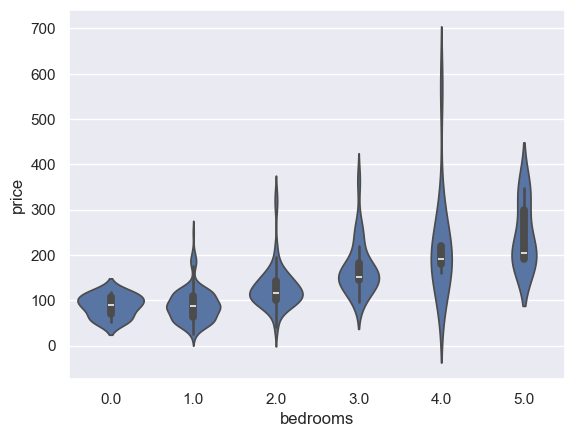

In [143]:
# Create the violin plot for price distribution in each property_type  
ax=sns.violinplot(x='bedrooms',y='price',data= df)

Observations -->

As number of bedrooms increase the price and price distribution increase.


5. Top number of bedrooms by Listing/property using Bar plot

bedrooms
1.0    0.592334
2.0    0.209059
3.0    0.090592
4.0    0.048780
0.0    0.038328
5.0    0.020906
Name: proportion, dtype: float64

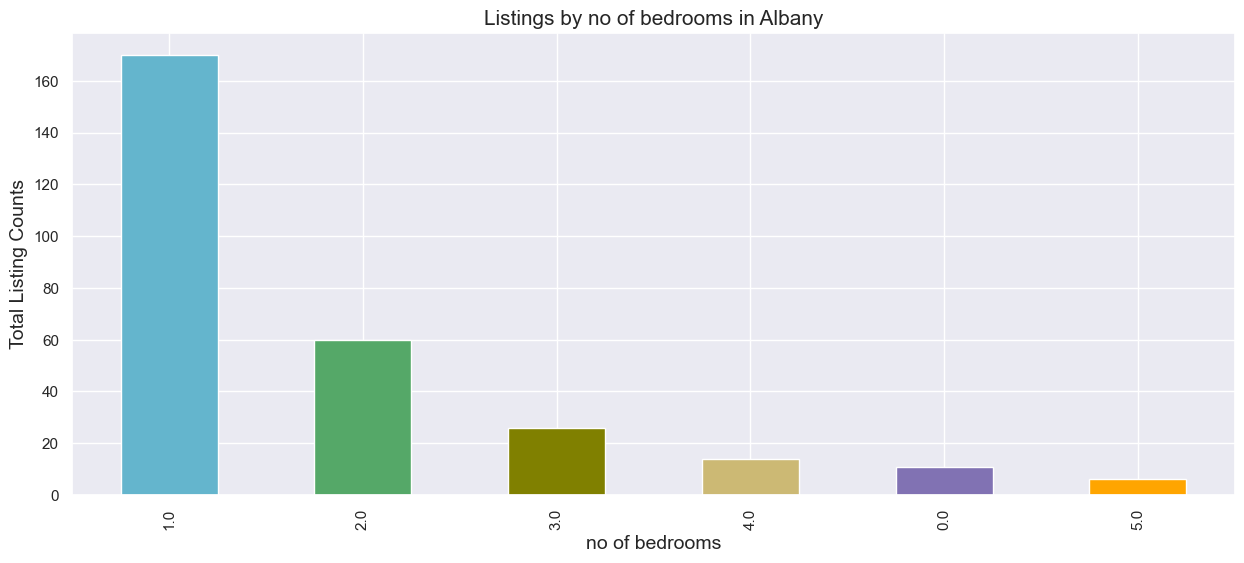

In [144]:
# Create a list of colors to use for the bars
colors = ['c', 'g', 'olive', 'y', 'm', 'orange']

# Create a bar plot of no of bedrooms using the specified colors
df['bedrooms'].value_counts().plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('no of bedrooms', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by no of bedrooms in Albany', fontsize=15)
df['bedrooms'].value_counts(normalize=True)

Observations -->

In terms of number of bedrooms, the most demanding is one and two bedrooms with 60% and 20% respectively.
As number of bedrooms increases the demand decreases.

6. Total Listing/Property count by number of accommodates using Bar chart.

accommodates
2     0.383275
4     0.195122
1     0.108014
3     0.101045
6     0.076655
5     0.041812
8     0.024390
7     0.024390
10    0.017422
12    0.010453
15    0.003484
14    0.003484
11    0.003484
13    0.003484
9     0.003484
Name: proportion, dtype: float64

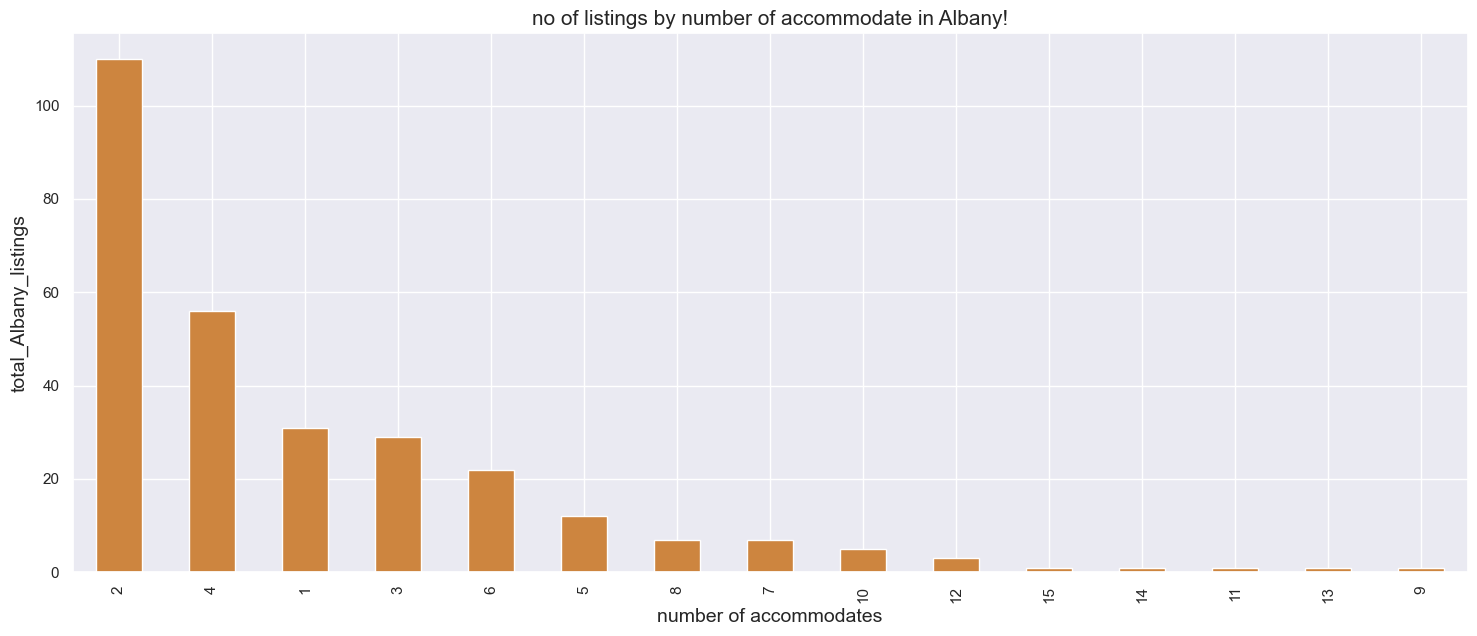

In [145]:
# Create a bar plot of the number of accommodates
df['accommodates'].value_counts().plot(kind='bar', color='peru', figsize=(18, 7))

# Set the x-axis label
plt.xlabel('number of accommodates', fontsize=14)

# Set the y-axis label
plt.ylabel('total_Albany_listings', fontsize=14)

# Set the title of the plot
plt.title('no of listings by number of accommodate in Albany!', fontsize=15)
df['accommodates'].value_counts(normalize=True)

Observations -->

The highest demanding number of accommodates are 2, 4, 1, 3 with 38%, 19%, 10%, 10% respectively.
The lowest demanding number of accommodates from nine to above.

7. Total Listing/Property count by number of beds using pie plot.

beds
1.0    0.505226
2.0    0.278746
3.0    0.094077
4.0    0.052265
0.0    0.027875
5.0    0.024390
6.0    0.013937
7.0    0.003484
Name: proportion, dtype: float64

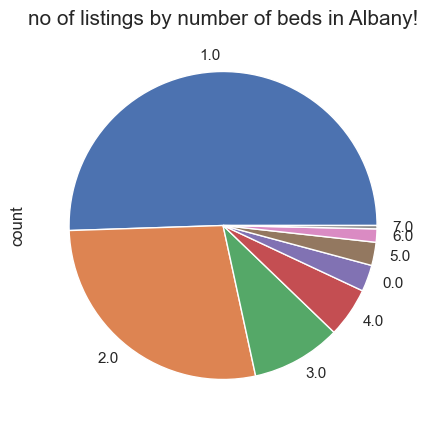

In [146]:
# Create a pie plot of the number of beds
df['beds'].value_counts().plot(kind='pie',figsize=(10, 5))

# Set the title of the plot
plt.title('no of listings by number of beds in Albany!', fontsize=15)
df['beds'].value_counts(normalize=True)


Observations -->

The highest demanding number of beds are 1, 2 with 50%, 28% respectively. The lowest demanding number of beds from five to above including zero no of beds.

In [147]:
# make new feature using availability_365 to categorize availability
import math
def check_av(value):
    if value == 0:
        return "no_av"
    elif value <= 30:
        days = math.ceil(value/10)*10
        return f"av_{days}"
    elif value <= 330:
        days = math.ceil(value/30)*30
        return f"av_{days}"
    else:
        return "av_all _the _year"

In [148]:
df['av_cat']= df['availability_365'].apply(check_av)

    8. Analysis using new  availability categories feature.

av_cat
av_all _the _year    0.257840
no_av                0.209059
av_270               0.090592
av_180               0.080139
av_300               0.073171
av_90                0.062718
av_330               0.052265
av_240               0.048780
av_150               0.027875
av_60                0.024390
av_120               0.024390
av_210               0.020906
av_20                0.010453
av_10                0.010453
av_30                0.006969
Name: proportion, dtype: float64

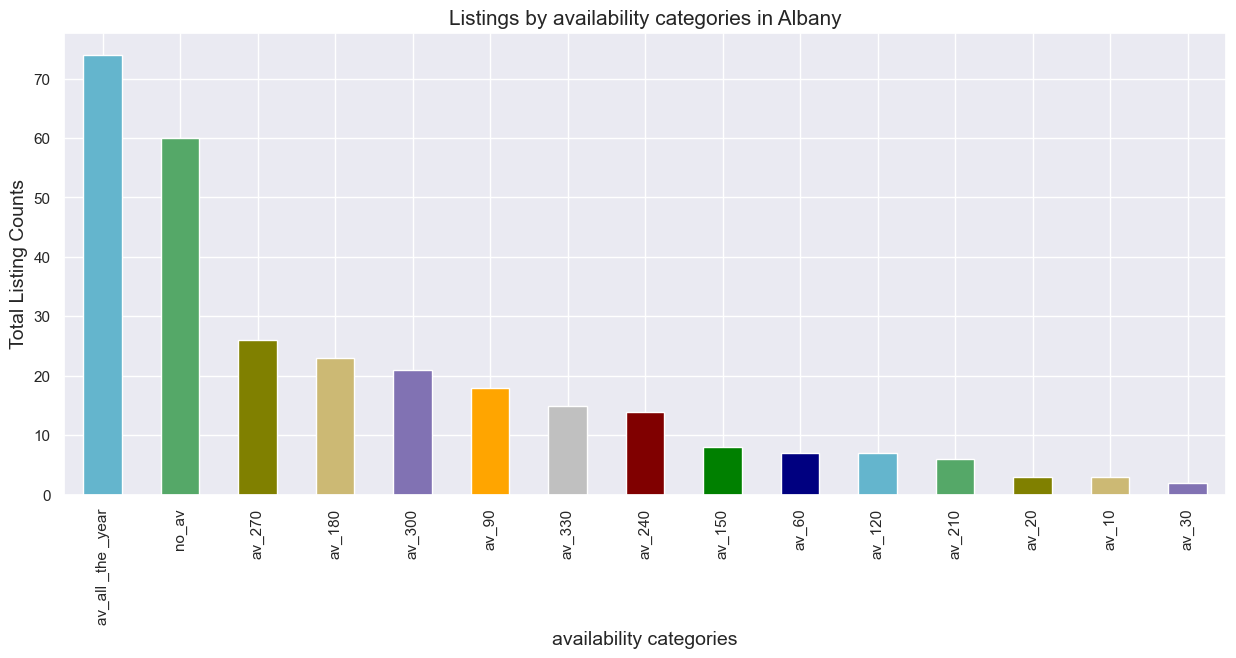

In [149]:
# Create a list of colors to use for the bars
colors = ['c', 'g', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']

# Create a bar plot of availability categories using the specified colors
df['av_cat'].value_counts().plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('availability categories', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by availability categories in Albany', fontsize=15)
df['av_cat'].value_counts(normalize=True)

Observations -->

av_all _the _year and no_av are the most dominant, we can make more deep analysis to make this new feature more informable.


room_type,Entire home/apt,Private room
av_cat,,
av_10,0.006969,0.003484
av_120,0.013937,0.010453
av_150,0.020906,0.006969
av_180,0.048780,0.031359
av_20,0.010453,0.000000
av_210,0.017422,0.003484
av_240,0.038328,0.010453
av_270,0.076655,0.013937
av_30,0.003484,0.003484


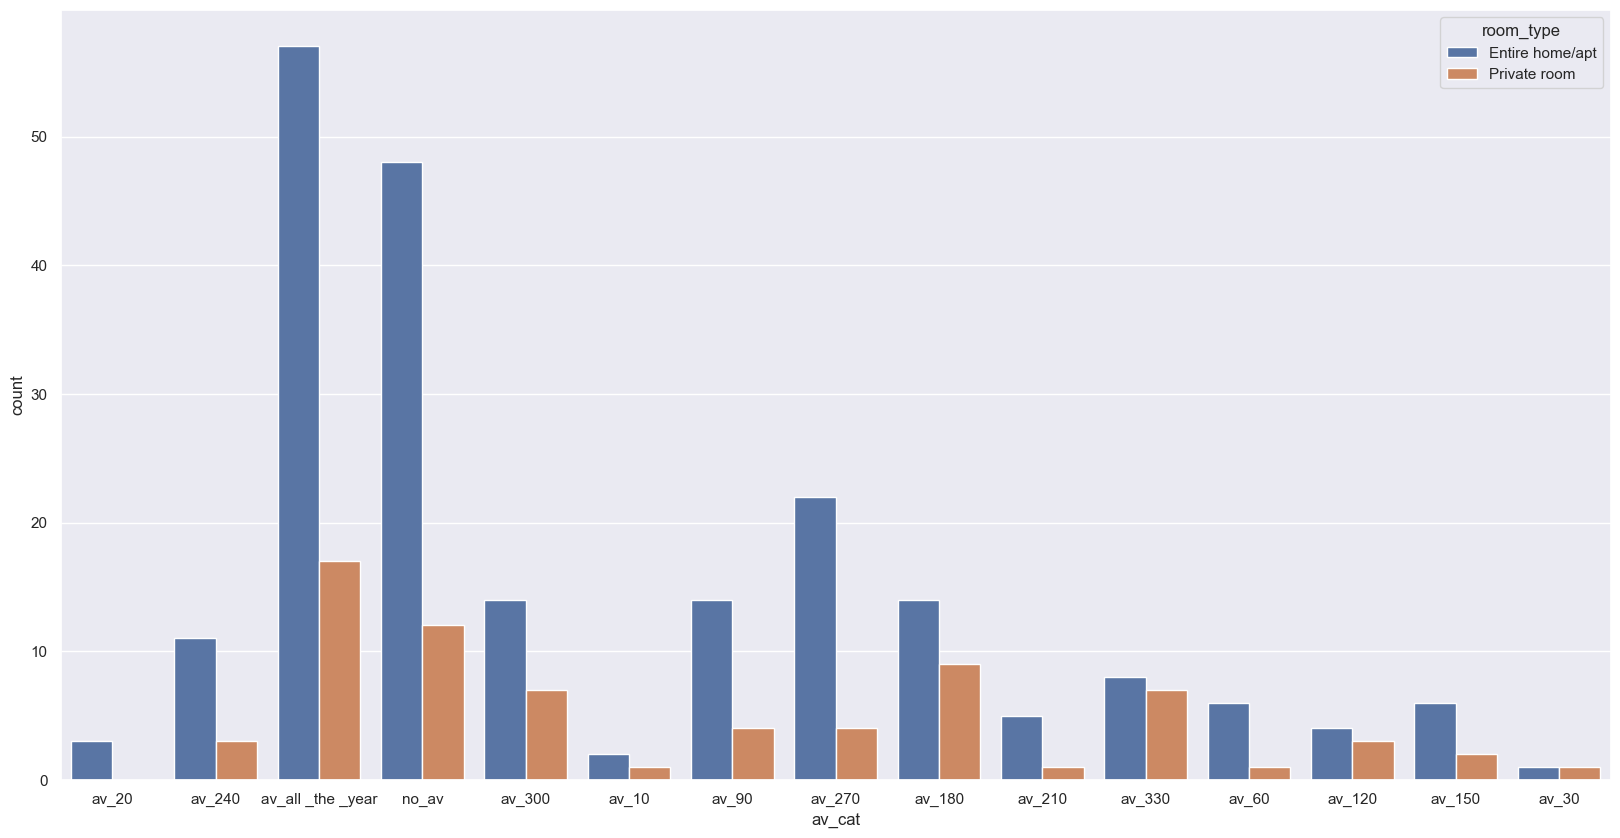

In [150]:
_, axes = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(20,10))
sns.countplot(x='av_cat', hue=df['room_type'].astype('str'), data=df, ax=axes)
#sns.countplot(x='Voice mail plan', hue=df['Churn'].astype('str'), data=df, ax=axes[1])
pd.crosstab(df['av_cat'], df['room_type'], normalize=True)



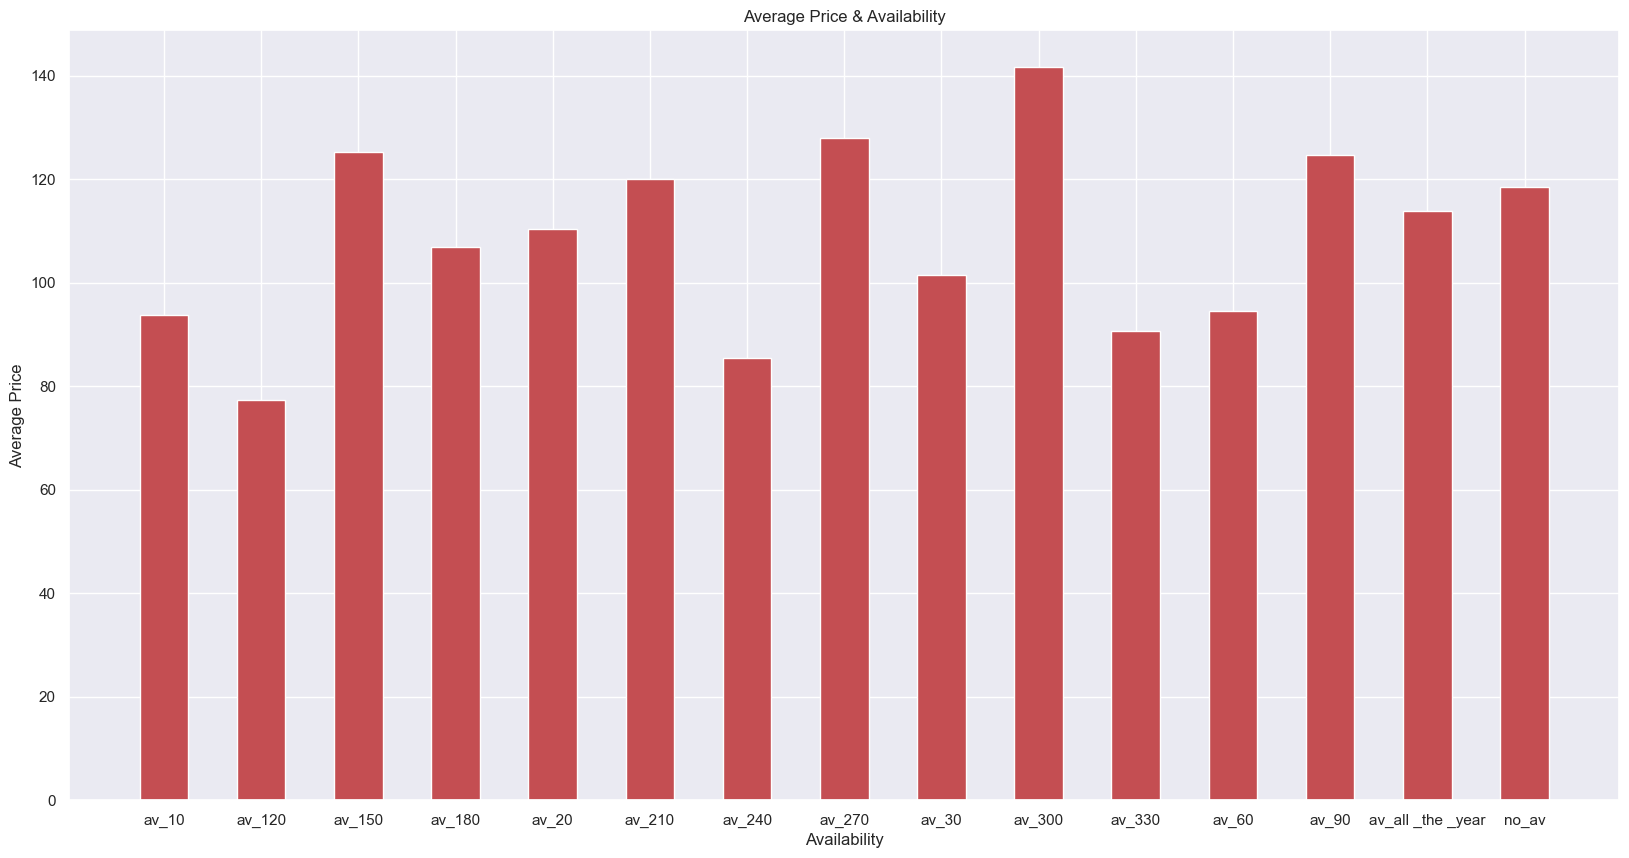

In [151]:
plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(20,10))
plt.bar(dict(df.groupby('av_cat')['price'].agg(np.mean)).keys(), dict(df.groupby('av_cat')['price'].agg(np.mean)).values(),width=0.5,color='r')
plt.xlabel('Availability')
plt.ylabel('Average Price')
plt.title('Average Price & Availability')

# Show the plot
plt.show()


Observations -->

No such pattern here but we will go to another one, but we can see that Entire home/apt has high demand.

9. Correlation Heatmap Visualization

In [152]:
# Calculate pairwise correlations between columns
# Drop non-numerical variables
plt.figure(figsize=(20,10))
numerical = list(
    set(df.columns)
    - {
        "id",
        "host_id",
        "property_type",
        "room_type",
        "av_cat",
    }
)
# Calculate pairwise correlations between columns
corr = df[numerical].corr()

# Display the correlation between columns
corr


,minimum_nights,price,maximum_nights,bedrooms,availability_90,calculated_host_listings_count,availability_365,beds,availability_60,avg_review_scores,reviews_per_month,availability_30,number_of_reviews,accommodates
minimum_nights,1.000000,-0.062422,-0.036485,-0.053763,0.055848,-0.047229,0.088984,-0.060126,0.053875,-0.046240,-0.080085,0.047894,-0.055108,-0.070655
price,-0.062422,1.000000,0.004241,0.633030,0.025964,0.214705,0.006873,0.688421,0.067498,0.091647,-0.036364,0.097404,-0.121278,0.751074
maximum_nights,-0.036485,0.004241,1.000000,-0.029023,0.022360,0.126210,0.182008,0.027986,0.003847,0.030948,-0.002942,0.000493,0.159173,-0.027304
bedrooms,-0.053763,0.633030,-0.029023,1.000000,-0.036839,0.070588,-0.044051,0.774464,-0.017050,0.029089,-0.014590,-0.018507,-0.174178,0.844249
availability_90,0.055848,0.025964,0.022360,-0.036839,1.000000,0.009604,0.706650,-0.048571,0.974131,-0.019970,-0.213216,0.898962,-0.155793,-0.065264
calculated_host_listings_count,-0.047229,0.214705,0.126210,0.070588,0.009604,1.000000,-0.077836,0.054857,0.040142,-0.033369,-0.072648,0.071484,-0.072503,0.092504
availability_365,0.088984,0.006873,0.182008,-0.044051,0.706650,-0.077836,1.000000,-0.051439,0.662617,-0.089144,-0.229118,0.577492,-0.148224,-0.060876
beds,-0.060126,0.688421,0.027986,0.774464,-0.048571,0.054857,-0.051439,1.000000,-0.022967,0.092384,0.111063,-0.021190,-0.006031,0.851178
availability_60,0.053875,0.067498,0.003847,-0.017050,0.974131,0.040142,0.662617,-0.022967,1.000000,-0.018273,-0.188001,0.948641,-0.140325,-0.036297
avg_review_scores,-0.046240,0.091647,0.030948,0.029089,-0.019970,-0.033369,-0.089144,0.092384,-0.018273,1.000000,0.156081,0.035069,0.089193,0.098788


<Figure size 2000x1000 with 0 Axes>

<Axes: >

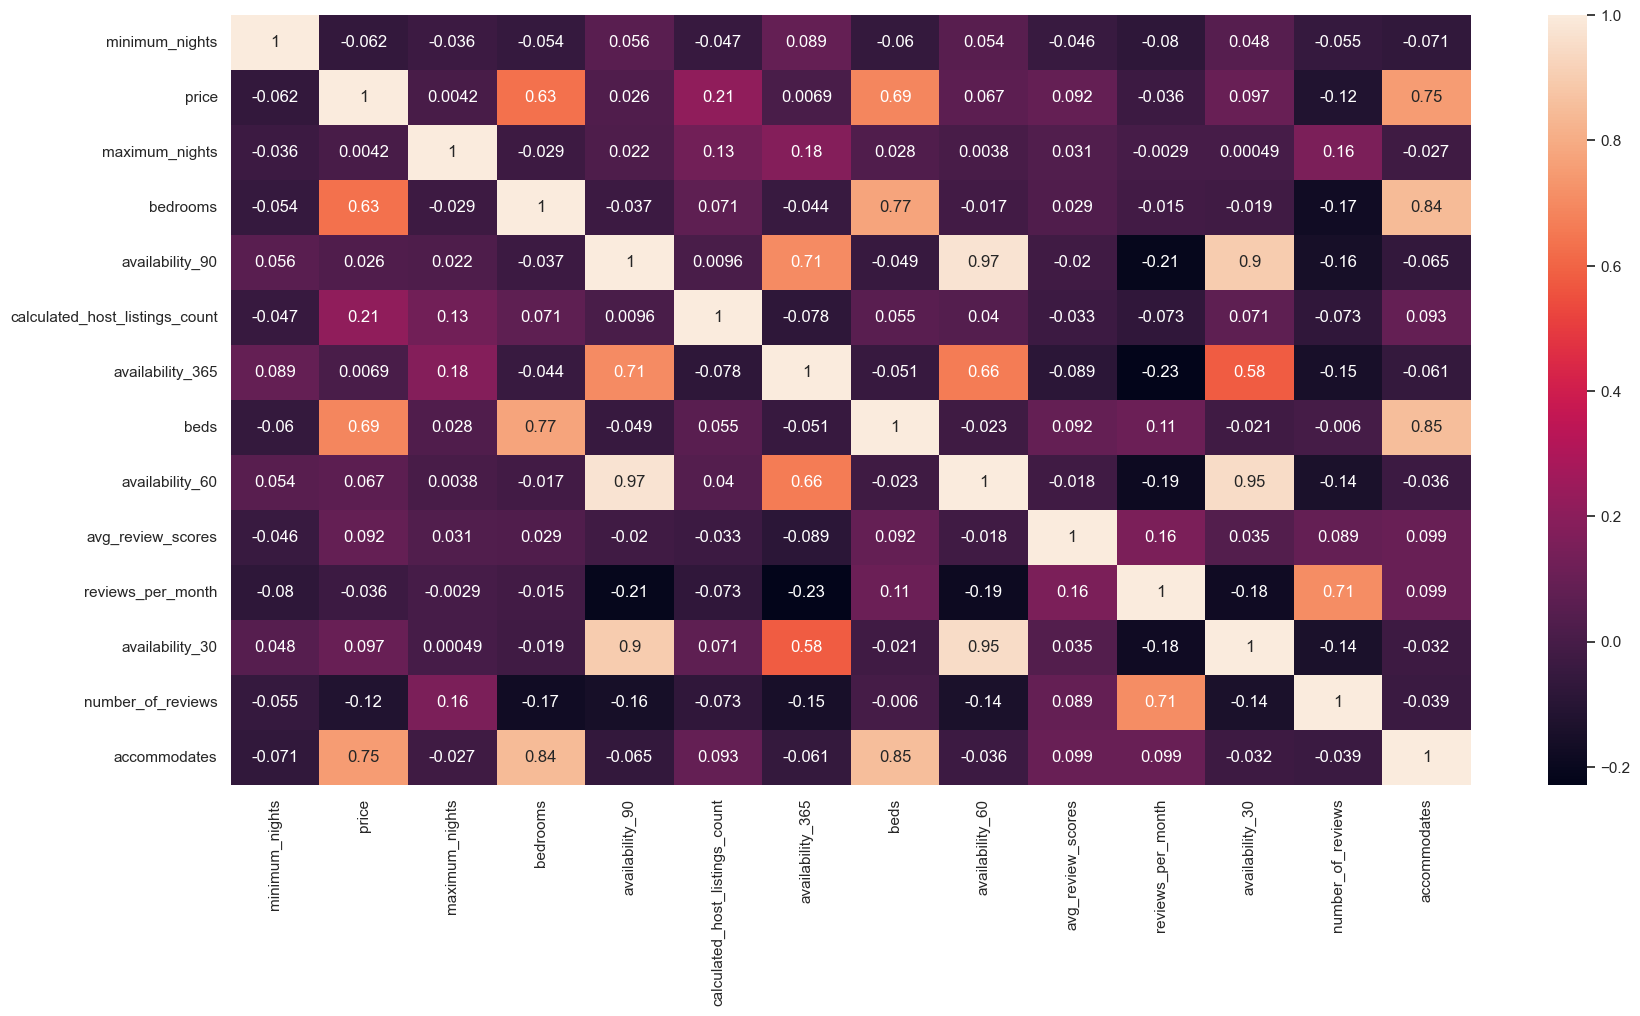

In [153]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical].corr(), annot=True)

Observations -->

Price, accommodates, bedrooms and beds features are strong coorrelated and drive the business in Albany city.

10. Pair Plot Visualization

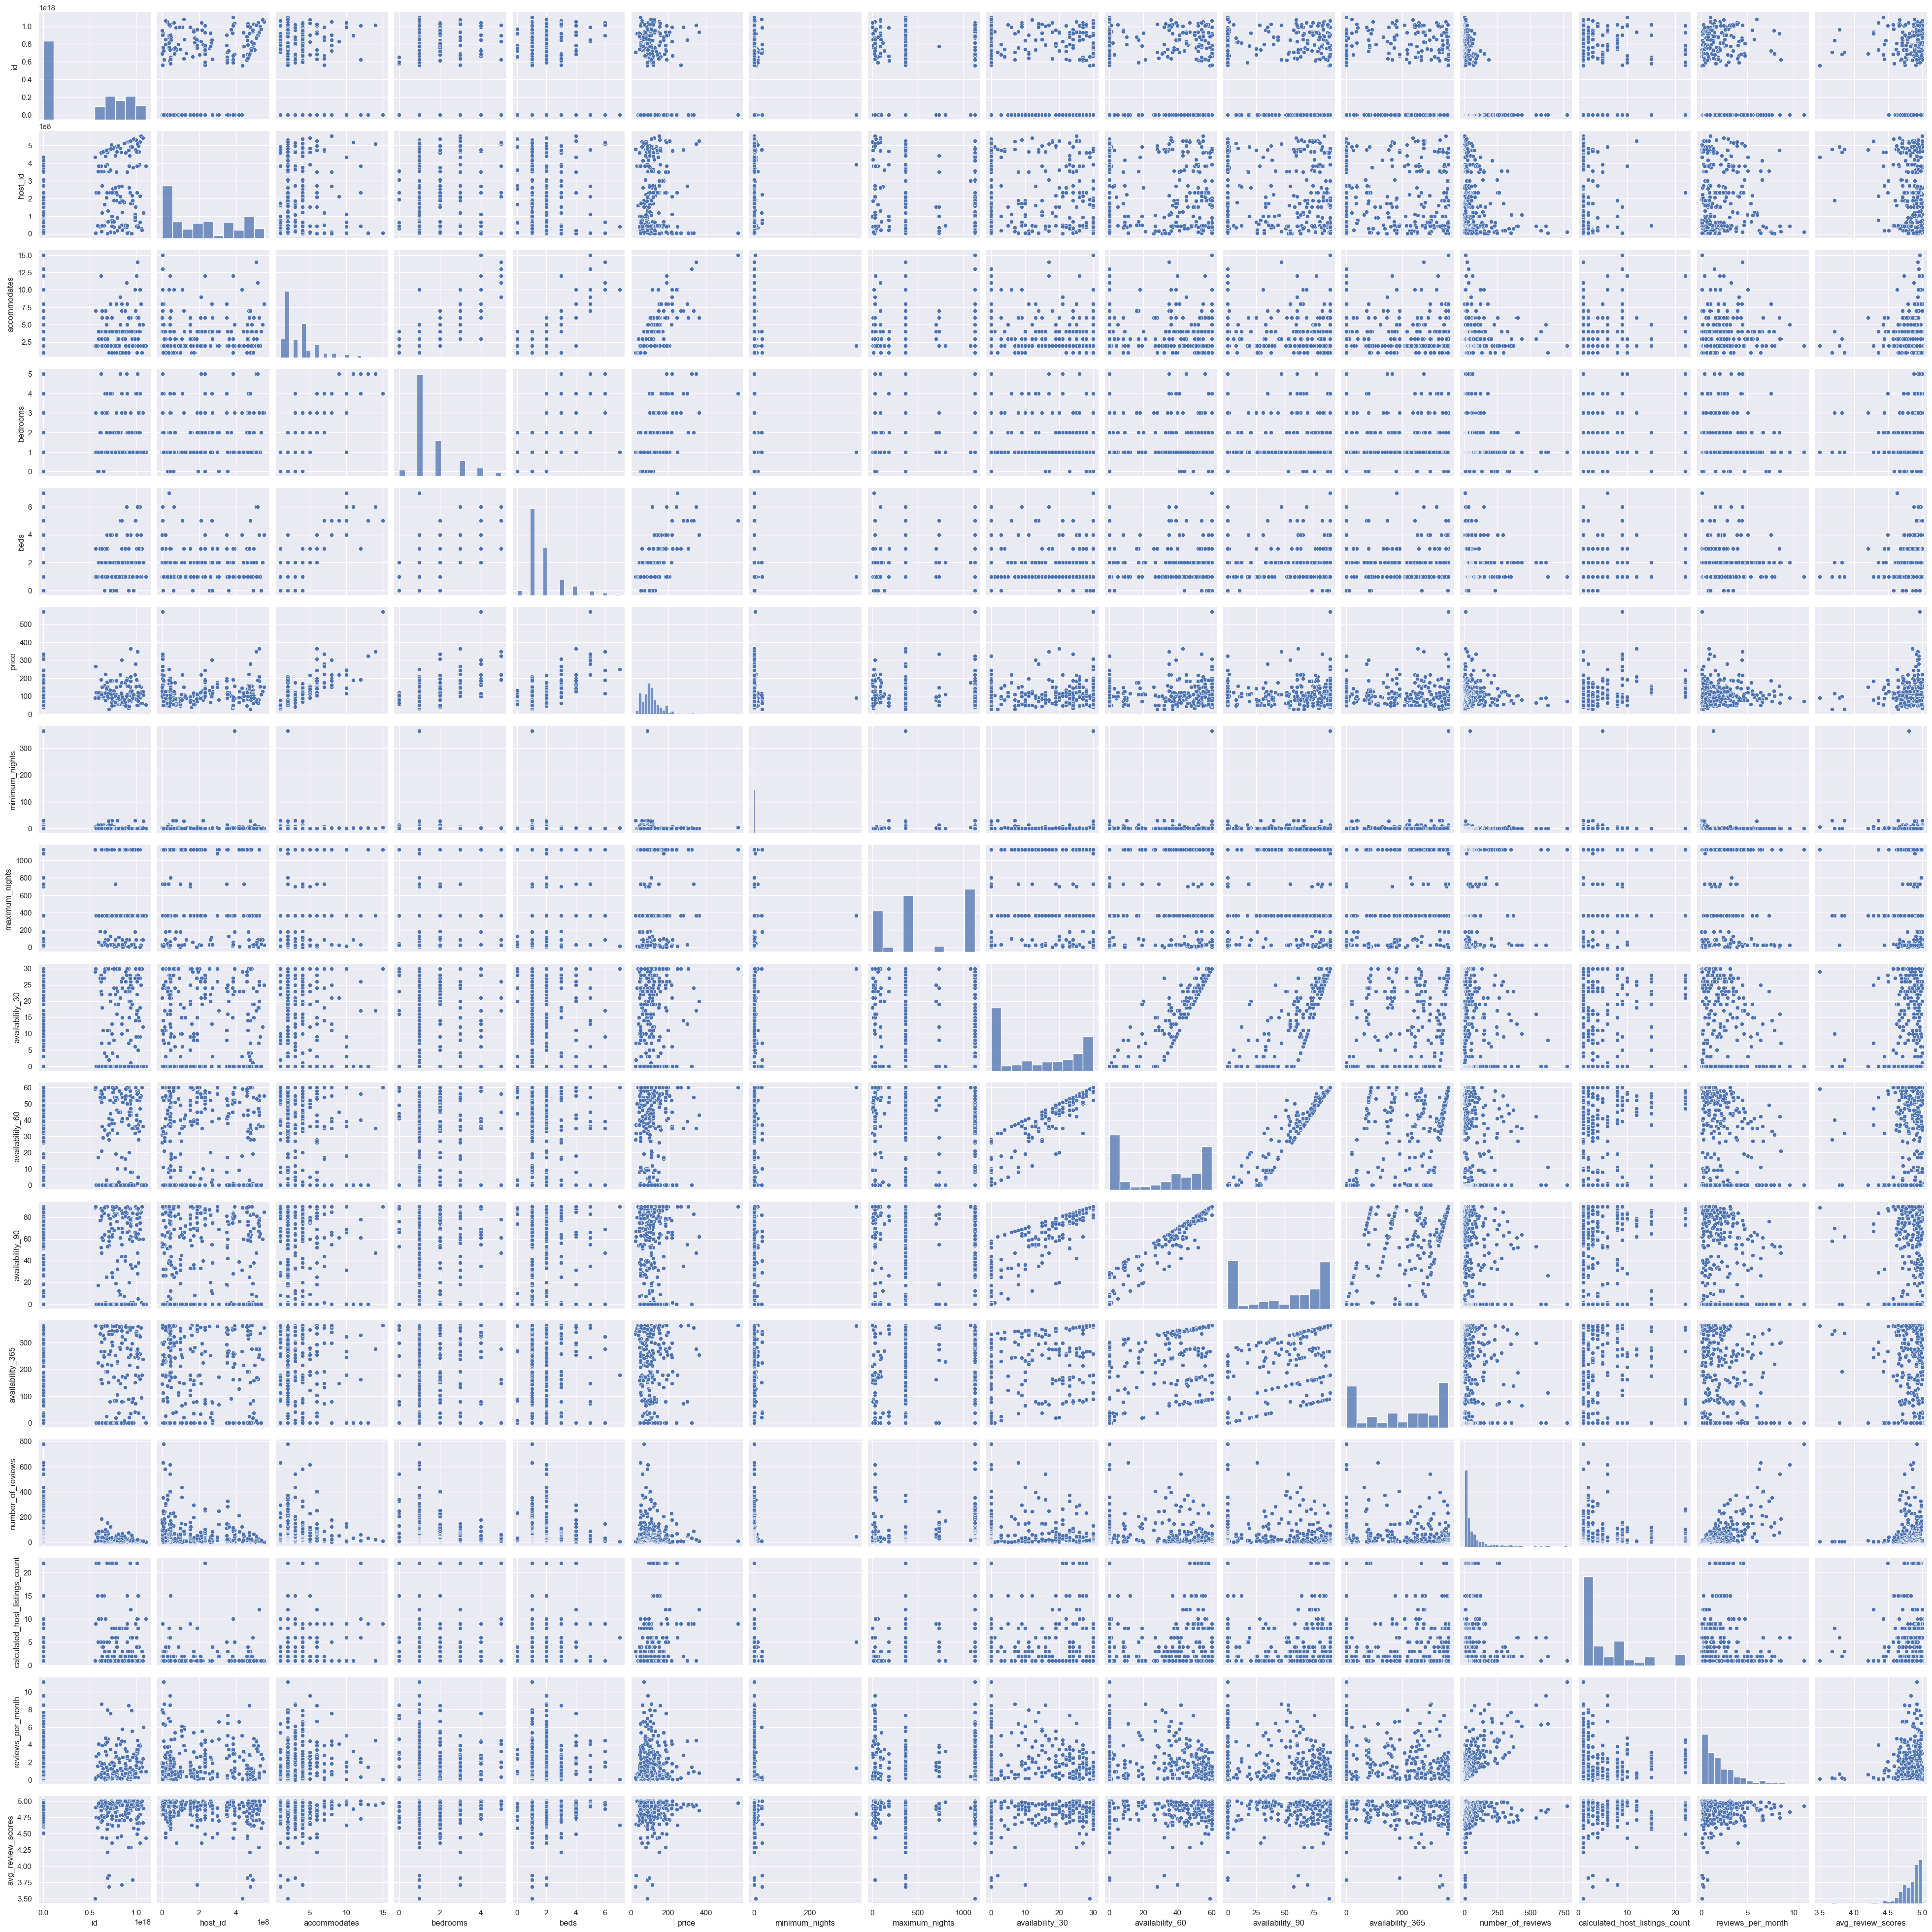

In [154]:
# create a pairplot using the seaborn library to visualize the relationships between different variables in the Airbnb Albany dataset
sns.pairplot(df)

# show the plot
plt.show()

- A pair plot consists of multiple scatterplots arranged in a grid, with each scatterplot showing the relationship between two variables

- It can be used to visualize relationships between multiple variables and to identify patterns in the data.

BUSINESS CONCLUSION :-

- About 80% of all listing requests are in Albany, NY, and all analysis and results coming will be for this highly sought after and highly recommended location for investment and we have tracked all the key factors impacting the business in this location.
- Price, accommodates, bedrooms and beds features are strong coorrelated and drive the business in Albany city.
- Demand for Airbnb rentals in Albany city influenced by these group of features (Price, accommodates, bedrooms, beds, property_type and room_type).

Observations -->
1. Price:
- The range of prices being charged on Airbnb rentals in Albany city appears to be from 26 to 628 dollars , with the majority of listings falling in the price range of 50 to 150 dollars(highest demand).
- The distribution of prices appears to have a peak in the 50 to 150 dollars range, with a relatively lower density of listings in higher and lower price ranges.
- There may be fewer listings available at prices above 250 dollars(lowest demand), as the density of listings drops significantly in this range.

2. No of beds: 
- The highest demanding number of beds are 1, 2 with 50%, 28% respectively. The lowest demanding number of beds from five to above including zero no of beds.

3. No of accommodates: 
- The highest demanding number of accommodates are 2, 4, 1, 3 with 38%, 19%, 10%, 10% respectively. The lowest demanding number of accommodates from nine to above.

4. No of bedrooms: 
- In terms of number of bedrooms, the most demanding is one and two bedrooms with 60% and 20% respectively.
- As number of bedrooms increases the demand decreases.

5. Price & No of accommodates:
- price increases as no of accommodates increases.

6. property_type:
- The highest property_type in demand are Entire rental unit, Private room in home and Entire home with 51%, 17.5%, 15.5% respectively.

6. room_type:
- The room_type demand at Albany city are: Entire home/apt with 75% Private room  with 25%.

7. room_type & property_type:
- The highest demand property_type in Entire home/apt room_type are: Entire rental unit and Entire home with 51% and 15% respectively of all data.
- The highest demand property_type in Private room room_type are: Private room in home with 17% of all data.

Insights -->

1. Listings falling in the price range of 50 to 150 dollars(highest demand) more attractive for investment.
2. Precentage of 1 & 2 No of beds have high demand with significant value, and according to this analysis, the larg No of beds decreases the demand and if you go to invist in Albany city 1 or 2 No of beds are best choice.
3. There strong demand for Airbnb rentals in Albany city for 2, 4, 1 and 3 No of accommodates that what any investiment have to go with.
4. Listing with one bedroom match 60% of demand.
5. Listing with larg No of accommodates is more lucrative.
6. the most appropriate listing property_type for investment is Entire rental unit.

#   <center>Thank You</center>